# Lab 2: Unsupervised Learning

The focus of this lab is to present the tools for conducting Unsupervised learning and specifically clustering using Python.
We will implement Kmeans and use sklearn to apply K-medoids, Kmeans, Hierarchical clustering and several clustering evaluation metrics. Linked with the topic of this lab is HW2. 



**Outline:**

1. K-means (sklearn)
2. K-means algorithm implementation 
3. K-means caveats
4. K-medoids
5. Evaluation metrics

6. Clustering on iris flower dataset


    -  K-means, K-medoids, **Agglomerative Clustering**, Evaluation metrics and plotting with high-dimensional data
    -  On Agglomerative Clustering: **Dendrogram** visualization with scipy

In [62]:
#importing libraries 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.metrics import pairwise_distances_argmin
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN


import warnings
warnings.filterwarnings("ignore")

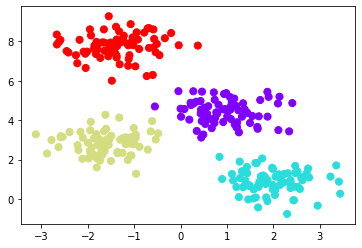

In [63]:
#Create some  Data
#make_blobs( )generates  Gaussian blobs ideal for clustering.
#link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
#the random state determines a random number generation for dataset creation. Essentially it generates a seed so that your results is always deterministic

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

#scatterplot to visualize the blobs
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_true ,cmap='rainbow');

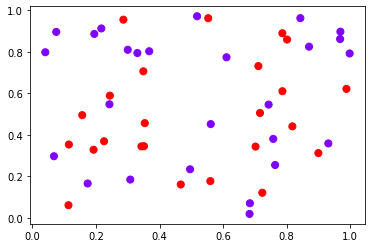

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
sample_data = np.random.rand(50, 2)  # 50 points in 2D space, renamed from 'X'
actual_labels = np.random.randint(0, 2, 50)  # 50 labels (either 0 or 1), renamed from 'y_true'

# Create scatter plot
plt.scatter(sample_data[:, 0], sample_data[:, 1], s=50, c=actual_labels, cmap='rainbow')

# Show plot
plt.show()


In [65]:
y_true.shape


(300,)

X will be a NumPy array of shape (n_samples, n_features), containing the generated samples. In this case, n_features is 2 by default, making it a 2D array where each row represents a point in 2D space.

In [66]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

In [67]:
X.shape

(300, 2)

In [68]:
#y_true are the integer labels for cluster membership of each sample
y_true

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

y_true will be a NumPy array of shape (n_samples,), containing the integer labels for the clusters to which each sample belongs. Since centers=4, these labels will be in the range [0, 1, 2, 3].

## 1. Kmeans (sklearn)

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. 

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically

In [69]:
# In general, scikit-learn has a pretty comprehensive user-guide. You should always advice the user page of the algorithm that you are using in order to understand its functionality.
# Here is the link for the Kmeans algorithm: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# Initialize a KMeans object, parameters of KMeans include the number of clusters and the initialization method

# Method for initialization: default is kmeans++

#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

#‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.

# the blobs that we made had 4 centers, so we will look for 4 clusters!
kmeans = KMeans(n_clusters=4)

# compute kmeans clustering
kmeans.fit(X)

# call the kmeans object, predict, to predict the cluster index of each sample. 

# storing the predicted class memberships in y_kmeans
y_kmeans = kmeans.predict(X)

# in one step: kmeans.fit_predict(X)

In [70]:
# numpy array of the predicted index or labels for each cluster. As we asked for 4 clusters, the clusters are numbered from 0 to 3. 
y_kmeans

array([2, 0, 3, 0, 2, 2, 1, 3, 0, 0, 1, 0, 3, 0, 2, 3, 3, 2, 1, 1, 2, 2,
       3, 1, 1, 3, 2, 3, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 2, 3, 1, 3, 3,
       1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 3, 0, 1, 1, 1,
       0, 2, 0, 1, 3, 1, 0, 1, 1, 0, 1, 3, 2, 0, 2, 3, 2, 2, 0, 3, 2, 3,
       0, 0, 3, 2, 0, 1, 1, 3, 2, 2, 3, 1, 0, 2, 0, 2, 3, 2, 2, 3, 0, 3,
       1, 1, 2, 0, 2, 3, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 3, 0, 0, 1, 3, 1, 3, 1, 0, 3, 0, 0, 0, 3, 0, 3,
       2, 1, 0, 1, 2, 3, 0, 3, 3, 2, 3, 1, 1, 3, 2, 3, 3, 0, 2, 3, 1, 0,
       2, 2, 3, 1, 2, 3, 1, 1, 3, 3, 3, 3, 2, 0, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 0, 3, 1, 2, 1, 3, 0, 1, 0, 3, 0, 3, 1, 3, 3, 0, 1, 1, 2, 2, 3,
       0, 2, 2, 1, 2, 1, 3, 0, 0, 3, 3, 0, 3, 2, 1, 3, 2, 1, 0, 1, 2, 3,
       2, 0, 0, 0, 0, 1, 1, 0, 3, 1, 2, 3, 1, 1, 1, 2, 2, 0, 3, 3, 1, 2,
       0, 1, 3, 0, 3, 2, 2, 1, 1, 3, 2, 2, 2, 3, 0, 0, 2, 2, 3, 2, 2, 2,
       0, 1, 0, 3, 2, 2, 0, 0, 0, 2, 2, 3, 0, 1])

In [71]:
y_kmeans.shape

(300,)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

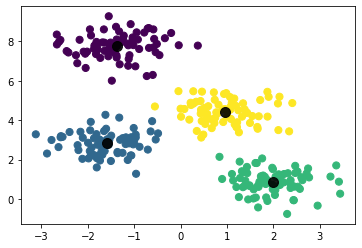

In [72]:
# the parameter c will map the sequence of numbers in y_kmeans (the cluster memberships) to colors
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# the cluster centers are stored as an attribured of the kmeans object. It will give you the coordinates of the cluster centers

centers = kmeans.cluster_centers_

# so we can plot those too! and make them black so they stand out
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.9);


In [73]:
# you can see the coordinated of the centers 
centers

array([[-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906]])

In [74]:
X.shape[0]

300

In [75]:
n_clusters=4
rseed=2
rng = np.random.RandomState(rseed)
i = rng.permutation(X.shape[0])[:n_clusters]

In [76]:
q = rng.permutation(X.shape[0])

In [77]:
q

array([289, 141, 131, 207, 176, 134, 211, 152, 123, 264,   0,  67,  26,
        65, 101, 217, 221,  49,  55, 265, 206,  56,  63, 291, 263, 204,
       290, 142,  39, 226, 188, 227, 146, 180, 223,  80, 205, 194,  77,
       233, 200, 155, 136,  34, 189,  16,  19, 105, 107,  61, 148, 293,
        72, 296,  13, 171, 258,  22,  40, 222,   1,  30, 120, 248, 279,
       235,  82, 261,  74, 212, 246, 172, 268, 108, 277,  88, 153, 232,
        89,  62, 109,  45,  84, 182,  33, 287, 157, 195, 167, 244, 185,
       255,  99, 149, 159, 286, 198, 281,  60, 299, 292, 284,  31,  44,
       116, 271, 161, 143,   3,  58, 237, 272,  85,  32, 203, 158, 283,
        18,  53, 129, 229, 285, 130, 178, 262, 297, 173, 273, 202, 122,
        66, 197, 280, 121,  46, 225,  28, 267, 209, 251, 103,  20, 137,
       110, 224, 112, 193, 250, 183,   6,   7, 164, 165,  43,  92, 274,
        50,  24,  38, 275, 150,  41, 295,  94, 133, 125,  23,  12, 132,
        96, 160,  36, 100, 213, 187,  83,  15, 139,  98,  81,  9

In [78]:
rng

RandomState(MT19937) at 0x242D658F340

In [79]:
i

array([ 98, 259, 184, 256])

The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.


## 2. K-Means implementation

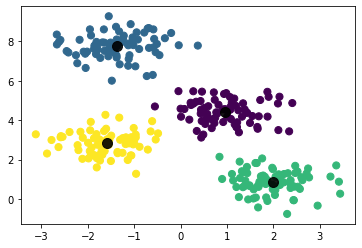

In [80]:
# K-means is very straightforward and easy to implement. This is an example of Kmeans implementation. 
# The initial centers are chosen randomly from the data samples. 
from IPython.display import clear_output

def kmeans(X, n_clusters, rseed=2):
    """
    Input:
        X: np array, the dataset to be clustered
        n_clusters: number of clusters we want our data to be grouped into

    Output:
        centers: np array, the centers coordinates
        labels: np array, the cluster memberships as found by Kmeans
    """


    # 1. Randomly choose clusters

    rng = np.random.RandomState(rseed) # generate a random number
    i = rng.permutation(X.shape[0])[:n_clusters] #get the n_cluster first elements from a randomly permulated sequence with length equal to the number of rows in X  
    
    centers = X[i] # retrieve from X the elements with index as found above and make those as our first random centers

    # Now that we generated the random centers we need to assign each point to one of these centers. 
    # To do that we need to calculate the distances between points and their closest centers. we can use sklearns pairwise_distances_argmin method for that.
    # link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html
    
    
    while True:
        # 2a. Assign labels based on closest center

        # This function computes for each row in X, 
        # the **index** of the row of centers which is closest (according to the specified distance).
        # as a parameter it also gets a metric to use for distance computation
        # the default is euclidean and this is what we are going to use here as we are implementing Kmeans
        
        labels = pairwise_distances_argmin(X, centers)



        # 2b. Find new centers from means of points

        # Next we need to find the **new center** of each cluster and we 
        # can do that by calculating the mean of points of each cluster

        
        new_centers = []
        for i in range(n_clusters):
            updated_center = (X[labels == i].mean(0))

            new_centers.append(updated_center)
            
        new_centers = np.array(new_centers)

        # here in one step 
        # new_centers = np.array([X[labels == i].mean(0)
                                #for i in range(n_clusters)])


        # 2c. Check for convergence
        if np.all(centers == new_centers): # Test whether all array elements evaluate to True.
            break
        centers = new_centers
        
        
        fig, ax = plt.subplots()
        clear_output(wait=True)
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
        # plot the centroids also
        ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.9)
        plt.pause(0.5)
        plt.show()

        
    return centers, labels

    
# call the K-means custom function
centers, labels = kmeans(X, 4)


## 3. CAVEATS of K-means
1. If we use a different random seed in our simple procedure, the particular starting guesses may lead to poor results (try to change the random seed to 3 in the method that we created above)



2. Another common challenge with k-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data. For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters




3. Because each iteration of k-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows. 



4. The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries. In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. 

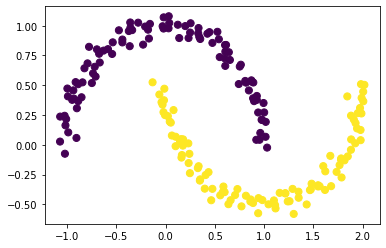

In [81]:
# To demonstrate bullet point 4:
# This dataset from sklearn makes two interleaving half circles

from sklearn.datasets import make_moons
circles, y_circles = make_moons(200, noise=.05, random_state=0)

plt.scatter(circles[:, 0], circles[:, 1], c=y_circles,
            s=50, cmap='viridis');

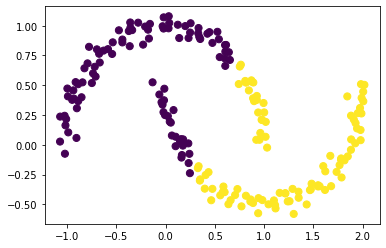

In [82]:

# Run kmeans with n_clusters=2 and plot the results as we did before!

# Kmeans completely failes to find the clusters as the boundaries here are not linear

labels = KMeans(2, random_state=0).fit_predict(circles)
plt.scatter(circles[:, 0], circles[:, 1], c=labels,
            s=50, cmap='viridis');

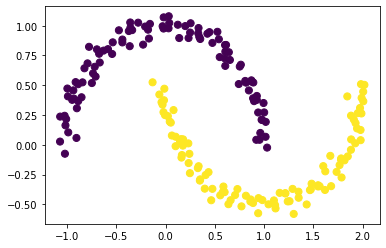

In [83]:
# Example of algorithm that would work on this dataset
# DBSCAN 
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.3, min_samples=2).fit_predict(circles)

plt.scatter(circles[:, 0], circles[:, 1], c=clustering,
            s=50, cmap='viridis');

## 4. K-medoids 

K-Medoids algorithm can be used with various other dissimilarity measures (e.g. cosine similarity) or any distance metrics, unlike K-Means which needs Euclidean distance metric to arrive at efficient solutions.

In [84]:
#K-medoids is not included in sklearn so download:
#pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids


In [85]:
# In this case we will use the manhattan metric; the manhattan metric is best for binary data
# To run Kmedoids on your dataset you follow a similar procedure as we did with KMeans.
# Link to kmedoids user guide: https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html

#Kmedoids object init
kmedoids = KMedoids(n_clusters=4, random_state=0, metric="manhattan")

In [86]:
#fit_predict
y_medoids = kmedoids.fit_predict(X)

In [87]:
y_medoids

array([0, 2, 3, 2, 0, 0, 1, 3, 2, 2, 1, 2, 3, 2, 0, 3, 3, 0, 1, 1, 0, 0,
       3, 1, 1, 3, 0, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 0, 3, 1, 3, 3,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 1, 1, 1,
       2, 0, 2, 1, 3, 1, 2, 1, 1, 2, 1, 3, 0, 2, 0, 3, 0, 0, 2, 3, 0, 3,
       2, 2, 3, 0, 2, 1, 1, 3, 0, 0, 3, 1, 2, 0, 2, 0, 3, 0, 0, 3, 2, 3,
       1, 1, 0, 2, 0, 3, 2, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       1, 0, 2, 1, 1, 2, 3, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 2, 2, 3, 2, 3,
       0, 1, 2, 1, 0, 3, 2, 3, 3, 0, 3, 1, 1, 3, 0, 3, 3, 2, 0, 3, 1, 2,
       0, 0, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 0, 2, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 2, 3, 1, 0, 1, 3, 2, 1, 2, 3, 2, 3, 1, 3, 3, 2, 1, 1, 0, 0, 3,
       2, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 2, 3, 0, 1, 3, 0, 1, 2, 1, 0, 3,
       0, 2, 2, 2, 2, 1, 1, 2, 3, 1, 0, 3, 1, 1, 1, 0, 0, 2, 3, 3, 1, 0,
       2, 1, 3, 2, 3, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 2, 0, 0, 3, 0, 0, 0,
       2, 1, 2, 3, 0, 0, 2, 2, 2, 0, 0, 3, 2, 1], d

In [88]:
#the labels predicted are saved as an attribute of the object
kmedoids.labels_

array([0, 2, 3, 2, 0, 0, 1, 3, 2, 2, 1, 2, 3, 2, 0, 3, 3, 0, 1, 1, 0, 0,
       3, 1, 1, 3, 0, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 0, 3, 1, 3, 3,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 1, 1, 1,
       2, 0, 2, 1, 3, 1, 2, 1, 1, 2, 1, 3, 0, 2, 0, 3, 0, 0, 2, 3, 0, 3,
       2, 2, 3, 0, 2, 1, 1, 3, 0, 0, 3, 1, 2, 0, 2, 0, 3, 0, 0, 3, 2, 3,
       1, 1, 0, 2, 0, 3, 2, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       1, 0, 2, 1, 1, 2, 3, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 2, 2, 3, 2, 3,
       0, 1, 2, 1, 0, 3, 2, 3, 3, 0, 3, 1, 1, 3, 0, 3, 3, 2, 0, 3, 1, 2,
       0, 0, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 0, 2, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 2, 3, 1, 0, 1, 3, 2, 1, 2, 3, 2, 3, 1, 3, 3, 2, 1, 1, 0, 0, 3,
       2, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 2, 3, 0, 1, 3, 0, 1, 2, 1, 0, 3,
       0, 2, 2, 2, 2, 1, 1, 2, 3, 1, 0, 3, 1, 1, 1, 0, 0, 2, 3, 3, 1, 0,
       2, 1, 3, 2, 3, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 2, 0, 0, 3, 0, 0, 0,
       2, 1, 2, 3, 0, 0, 2, 2, 2, 0, 0, 3, 2, 1], d

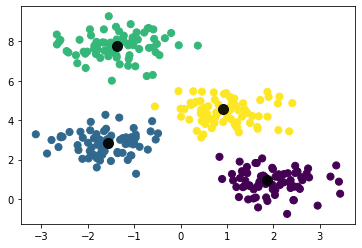

In [89]:
#plot the result of kmedoids
plt.scatter(X[:, 0], X[:, 1], c=y_medoids, s=50, cmap='viridis');

#the clusters centers are stored in an attribute called cluster_centers_
centers = kmedoids.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.9);


## 5. Evaluation metrics: External and Internal

Given the knowledge of grounds truth labels with can use: adjusted rand index. If we do not have the class labels then we can use silhouette score. 

The choice of metric depends on what we are interested in investigating and on the existance of the class/ground truth. 

In [90]:
from sklearn import metrics
import pandas as pd 

# given that we have the class labels of the dataset we can use the so called external measures
# For example we can use Adjusted Rand Index 
# It has two parameters namely labels_true, which is ground truth class labels, and labels_pred, which are clusters labels to evaluate. 

# With no knowledge of the class, we use internal measures. 
# Silhouette score is an internal measure because the clustering is evaluated based on merely the data that
# was used for the clustering, 
# The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).


# Rand index of 1 means that we have perfectly matching labelings 
# a silhouette score with a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

# X: array-like of shape (n_samples, n_features), the dataset 
# metric: string, the metric to use when calculating distance between instances in the feature array X. Used only for silhouette_score.  
# labels: the predicted labels 
print("Silhoette_score for Kmeans: ", metrics.silhouette_score(X=X, labels=y_kmeans, metric="euclidean"))


# labels_pred: the labels predicted by the algorithm, array-like 
# labels_true: the true labels of the dataset/ground truth, array-like. None if labels do not exist
print("ARI for Kmeans: ", metrics.adjusted_rand_score(labels_true=y_true, labels_pred=y_kmeans))


Silhoette_score for Kmeans:  0.6819938690643478
ARI for Kmeans:  1.0


In [91]:

print("Silhoette_score for Kmedoid: ", metrics.silhouette_score(X=X, labels=y_medoids, metric="manhattan"))
print("ARI for Kmedoid: ", metrics.adjusted_rand_score(labels_true=y_true, labels_pred=y_medoids))

Silhoette_score for Kmedoid:  0.6834139981928316
ARI for Kmedoid:  1.0


## 6. Clustering on Iris Flower Dataset


In [92]:
"""
The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).
Stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.
"""

iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [93]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [101]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [102]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [103]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [104]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [105]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

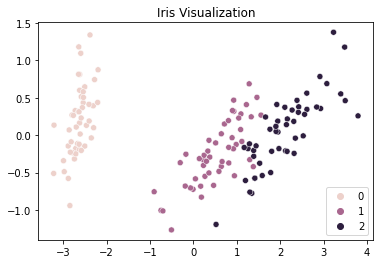

In [106]:
# Lets see how our dataset looks like

# Plotting multi-dimensional datasets with more than two attributes is not as trivial. 
# You can always reduce the dimensionality of the feature space by applying PCA on the dataset and plot the resulting principal components. 

from sklearn.decomposition import PCA
import seaborn as sns 

#X is 2d array with 4 features
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

#hue=y plots based on the target colour
#as y is iris.targets

sns.scatterplot(x=pca_2d[:, 0],y=pca_2d[:, 1],hue=y)
plt.title("Iris Visualization")
plt.show()


In [107]:
# NOTE that if your variables are of incomparable units, before clustering you need to standardize them! Example: some variables are in cm and some other are in kg. 

### K-means on iris

In [108]:
# NOTE that if you would like to find the optimal number of clusters for your dataset you could run the elbow method for your dataset. 
## Kmeans++ init  (the default one)

kmeans_iris = KMeans(n_clusters=3)
kmeans_labels = kmeans_iris.fit_predict(X)


In [109]:
# dictionary to store the predicted cluster memberships of the algorithms
labels_dict = {}
labels_dict["kmeans"] = kmeans_labels

### K-medoids on iris

In [110]:
# run also KMedoids
kmedoids = KMedoids(n_clusters=3, metric='euclidean')
kmedoids_labels = kmedoids.fit_predict(X)
labels_dict["kmedoids"] = kmedoids_labels

### Agglomerative Clustering (on iris)


Agglomerative clustering refers to a collection of algorithms  that build upon the same principle: the algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied. The stopping criterion in sklearn version is the number of clusters. 
What exactly is the most similar cluster is measured by several linkage criteria (sklearn choices: ward, average, complete). 
ward works on most datasets, but if the clusters have dissimilar members (if one is much bigger than all others, for example) then average/complete might work better. 

In [111]:
# import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering


# Ward is the default linkage algorithm, so we'll start with that
# Ward picks two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are equally sized.

# Agglomerative clustering works in the same way as the other algorithms from sklearn that we have seen so far. However, because of the way the algorithm works. 
# agglomerative clustering cannot make predictions for new data points. 
# Therefore, AgglomerativeClustering has no predict method. To build the model and get the cluster memberships on the dataset, use the fit_predict method instead. 

ward = AgglomerativeClustering(n_clusters=3)
ward_labels = ward.fit_predict(X)
labels_dict["ward"] = ward_labels


Let's also try complete and average linkages


In [112]:
# Create an instance of AgglomerativeClustering with the appropriate parameters
# complete linkage merges the two clusters that have the smallest maximum distance between their points 
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
# Fit & predict
complete_labels = complete.fit_predict(X)
labels_dict["complete"] = complete_labels



# using average linkage
# average linkage merges the two clusters that have the smallest average distance between all their points
avg = AgglomerativeClustering(n_clusters=3, linkage='average')
# fit and predict the cluster membership labels
avg_labels = avg.fit_predict(X)
labels_dict["avg"] = avg_labels


### Compare the algorithms based on metrics

In [113]:
def evaluation_metrics(X, labels_predicted, labels_true, metric):

    """
    Input: 
        X: array-like, the dataset
        labels_predicted: array-like, the labels predicted by the algorithm 
        labels_true: array-like, ground truth, pass None if you don't have the ground truth labels
        metric: metric to use for the calculation of the silhouette score, ex. 'euclidean', 'manhattan'
    Output:
        ari: the adjusted rand index value
        ss: the silhouette score value
    
    """
    ari = metrics.adjusted_rand_score(labels_true=labels_true, labels_pred=labels_predicted)
    ss = metrics.silhouette_score(X=X, labels=labels_predicted, metric=metric)

    return ari, ss


for keys, values in labels_dict.items():
    print("Clustering Algorithm: ", keys)
    
    ari, ss = evaluation_metrics(X, values, y, 'euclidean')
    
    print("Silhouette Score: ", np.round(ss, decimals=3) , "ARI: ", np.round(ari, decimals=3))


Clustering Algorithm:  kmeans
Silhouette Score:  0.553 ARI:  0.73
Clustering Algorithm:  kmedoids
Silhouette Score:  0.52 ARI:  0.758
Clustering Algorithm:  ward
Silhouette Score:  0.554 ARI:  0.731
Clustering Algorithm:  complete
Silhouette Score:  0.514 ARI:  0.642
Clustering Algorithm:  avg
Silhouette Score:  0.554 ARI:  0.759


### Visualization, compare the clustering results

Figure(1080x432)
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


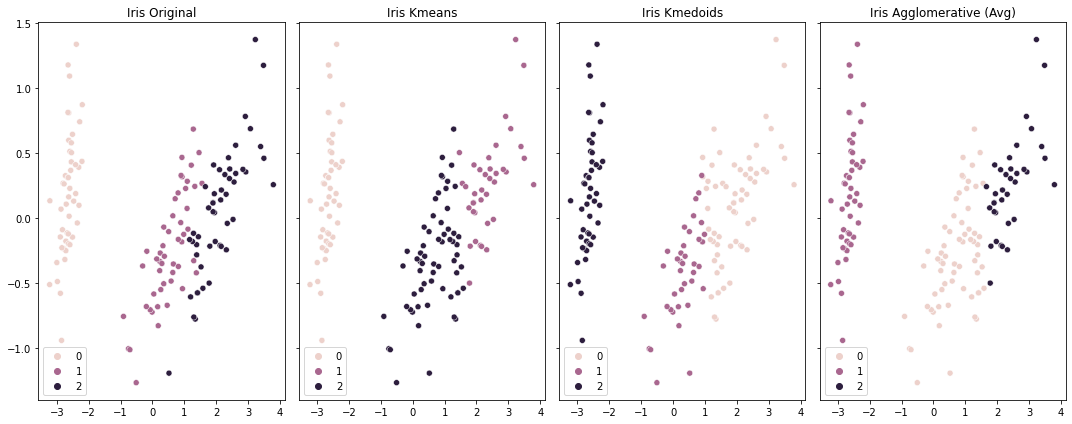

In [122]:
# most of the seaborn plots return a matplotlib axes object. So we can use the subplots() function to plot subplots with seaborn.

f, axes = plt.subplots(1, 4,  sharey=True,figsize=(15, 6))
print(f)
print(axes)

sns.scatterplot(x=pca_2d[:, 0],y=pca_2d[:, 1], hue=y, ax=axes[0])
axes[0].set_title("Iris Original" )

sns.scatterplot(x=pca_2d[:, 0],y=pca_2d[:, 1],hue=kmeans_labels, ax=axes[1])
axes[1].set_title("Iris Kmeans")

sns.scatterplot(x=pca_2d[:, 0],y=pca_2d[:, 1],hue=kmedoids_labels, ax=axes[2])
axes[2].set_title("Iris Kmedoids")

sns.scatterplot(x=pca_2d[:, 0],y=pca_2d[:, 1],hue=avg_labels, ax=axes[3])
axes[3].set_title("Iris Agglomerative (Avg)")

plt.tight_layout()

### On Agglomerative Clustering: Dendrogram visualization with scipy


The nice thing about hierarchical clustering is that it provides a complete dendrogram illustrating the relationships between clusters in our data. 
Unfortunately, scikit-learn currently does not have the functionality to draw dendrograms easily. But we can generate it easily using SciPy. 


Let's visualize the highest scoring clustering result.

To do that, we'll need to use Scipy's linkage function to perform the clustering again so we can obtain the linkage matrix it will later use to visualize the hierarchy

In [126]:
# The scipy clustering algorithms have a slightly different interface to the scikit-learn 
#clustering algorithms. SciPy 
#provides a function that takes a data array X and computes a linkage array, which 
# encodes the cluster similarities. We can then feed this linkage array into the scipy
#dendrogram function to plot the dendrogram. 


# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'average'

linkage_matrix = linkage(X, linkage_type)

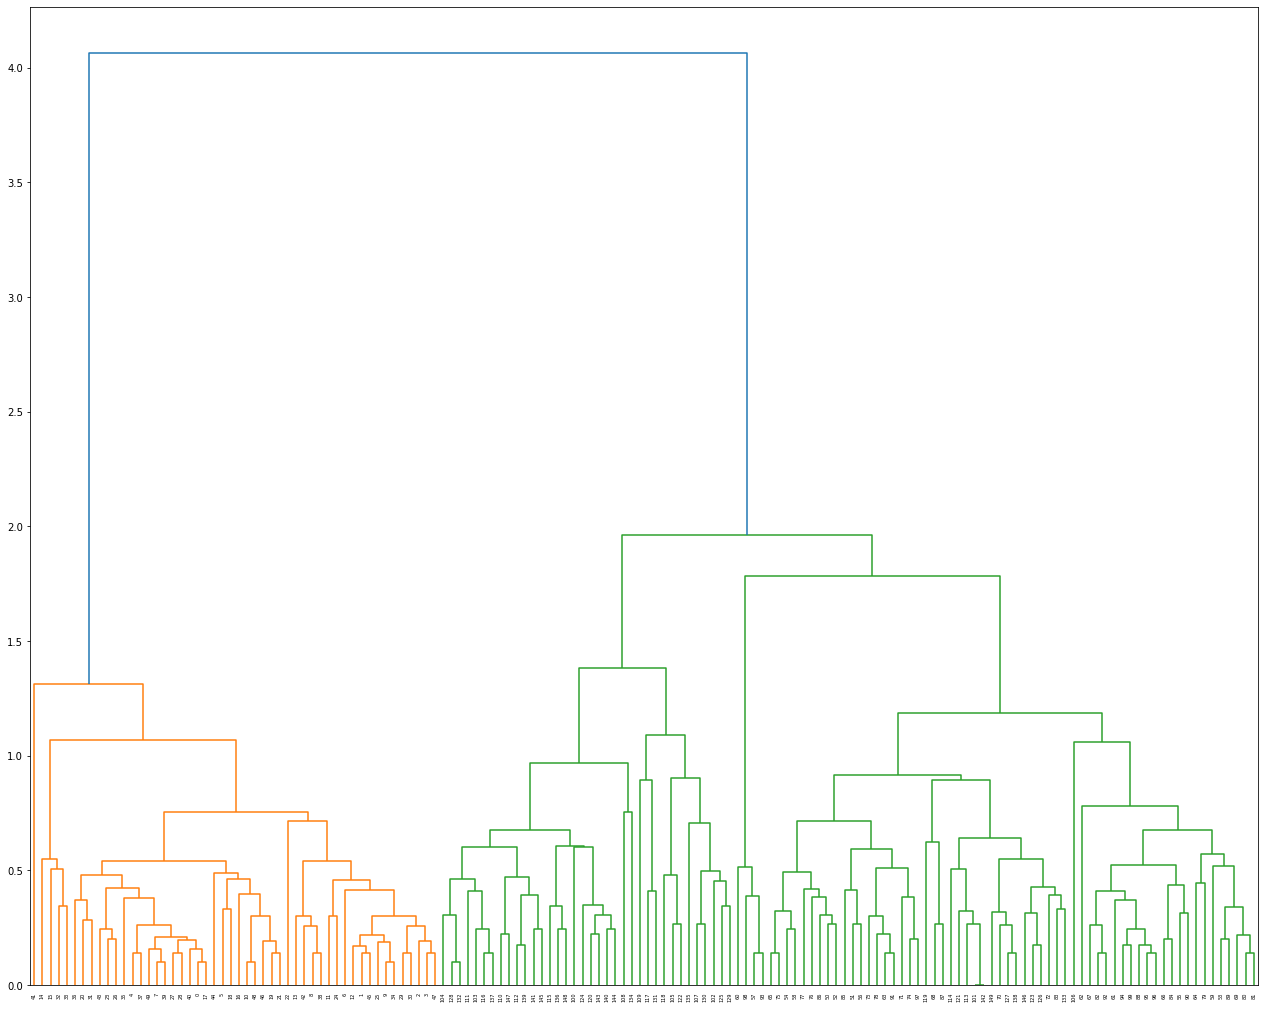

In [135]:
# Plot using scipy's dendrogram function
from scipy.cluster.hierarchy import dendrogram

import matplotlib.pyplot as plt

plt.figure(figsize=(22,18))

# plot for the linkage_matrix using 'dendrogram()'
dendrogram(linkage_matrix)
#dendrogram(linkage_matrix)
plt.show()


# On the x axis you see labels which are the indices of your samples in X. On the y axis you see the distances (of the 'average' method in our case).

# Starting from each label at the bottom, you can see a vertical line up to a horizontal line. 
# The height of that horizontal line tells you about the distance at which this label was 
# merged into another label or cluster. You can find that other cluster by following the other vertical line down again. 
# If you don't encounter another horizontal line, it was just merged with the other label you reach, otherwise it was merged into another cluster that was formed earlier.

We can use a dendogram  to choose a number of the cluster for our data. Remember, a dendrogram only shows us the hierarchy of our data; it does not exactly give us the most optimal number of clusters.


In order to identify clusters, we can cut the dendrogram horizontaly. The height of the cut to the dendrogram controls the number of clusters obtained. we can choose the cut-off point that cut the tallest vertical line

# END OF LAB 2